In [11]:
%run "/home/usriniva/uller_modified/discrete_time/Hanna_simu/simulation/impport_packages.ipynb"    #import all necessary packages - numpy, pandas etc

In [12]:
no_files= 6
dim_objnames_onlygen= {}



In [13]:
# Folder path
folder_path = "/home/usriniva/uller_modified/discrete_time/Hanna_simu/results/only_gen"


for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith(".pkl"):
        
        file_path = os.path.join(folder_path, filename)
        print(f"Loading: {filename}")
        
        # Load the pickle file
        with open(file_path, "rb") as file:
            data = pickle.load(file)
            
        nof_dims = re.findall(r'[0-9]+', filename)[0]
        name= f'ntl_{nof_dims}'
        dim_objnames_onlygen[name] = data
        
        print(f"Loaded {filename} into {name}")

Loading: results_dim10_og.pkl
Loaded results_dim10_og.pkl into ntl_10
Loading: results_dim1_og.pkl
Loaded results_dim1_og.pkl into ntl_1
Loading: results_dim25_og.pkl
Loaded results_dim25_og.pkl into ntl_25
Loading: results_dim2_og.pkl
Loaded results_dim2_og.pkl into ntl_2
Loading: results_dim35_og.pkl
Loaded results_dim35_og.pkl into ntl_35
Loading: results_dim5_og.pkl
Loaded results_dim5_og.pkl into ntl_5


In [ ]:
globals().update(dim_objnames_onlygen) # neat way to unpack variables
sorted_og_keys = sorted(dim_objnames_onlygen.keys(), key=lambda x: int(re.findall(r'\d+', x)[0]))

In [18]:
sorted_og_keys

['ntl_1', 'ntl_2', 'ntl_5', 'ntl_10', 'ntl_25', 'ntl_35']

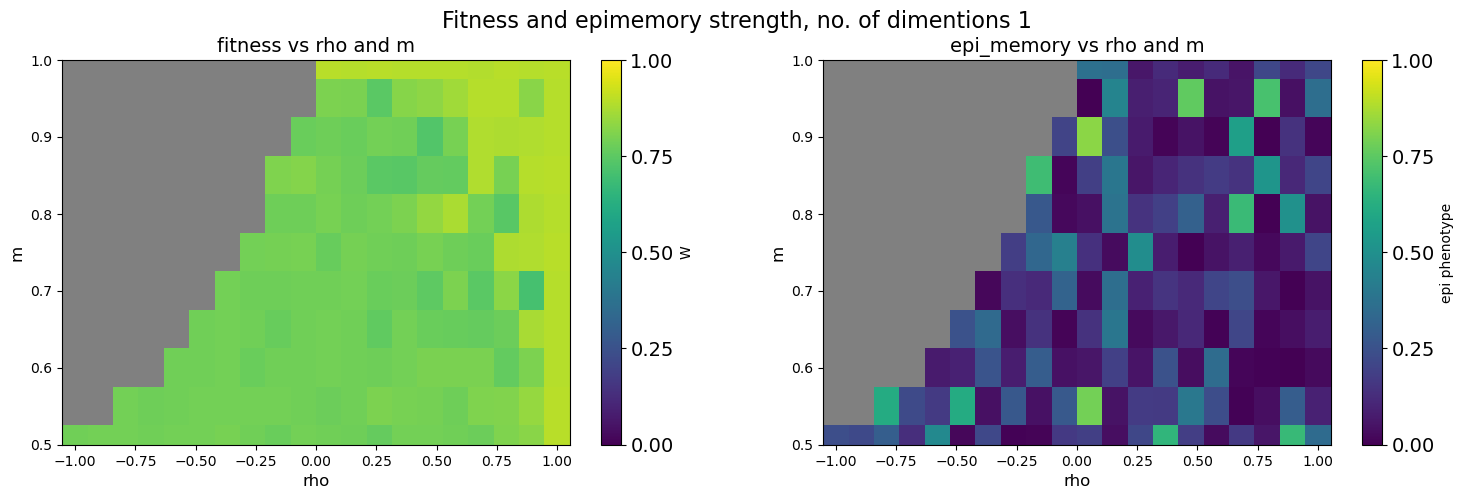

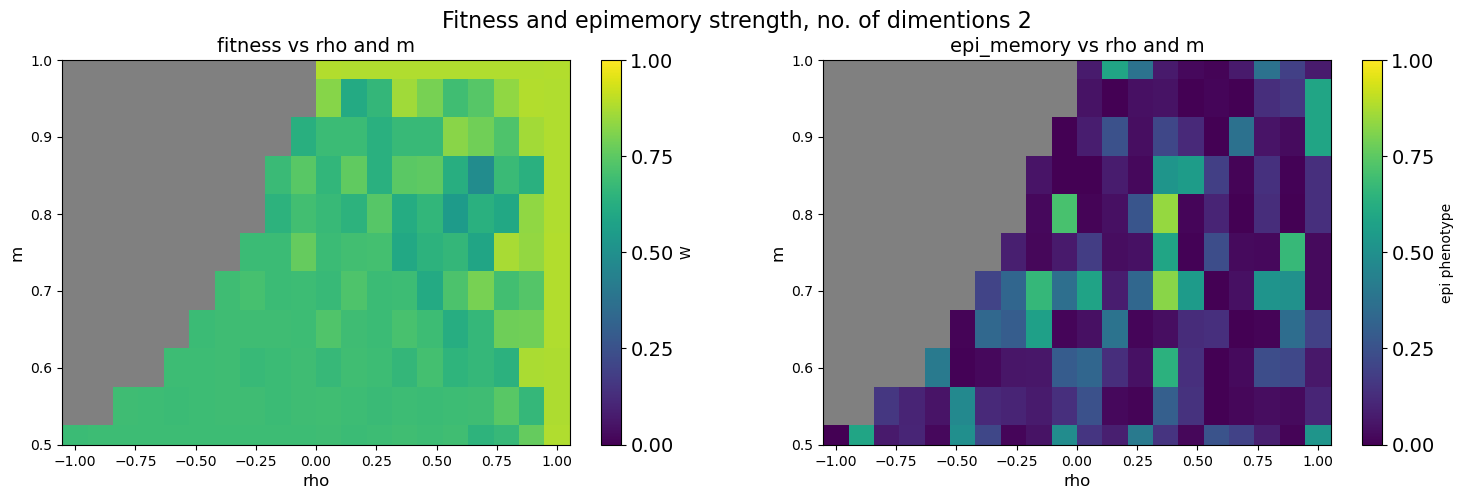

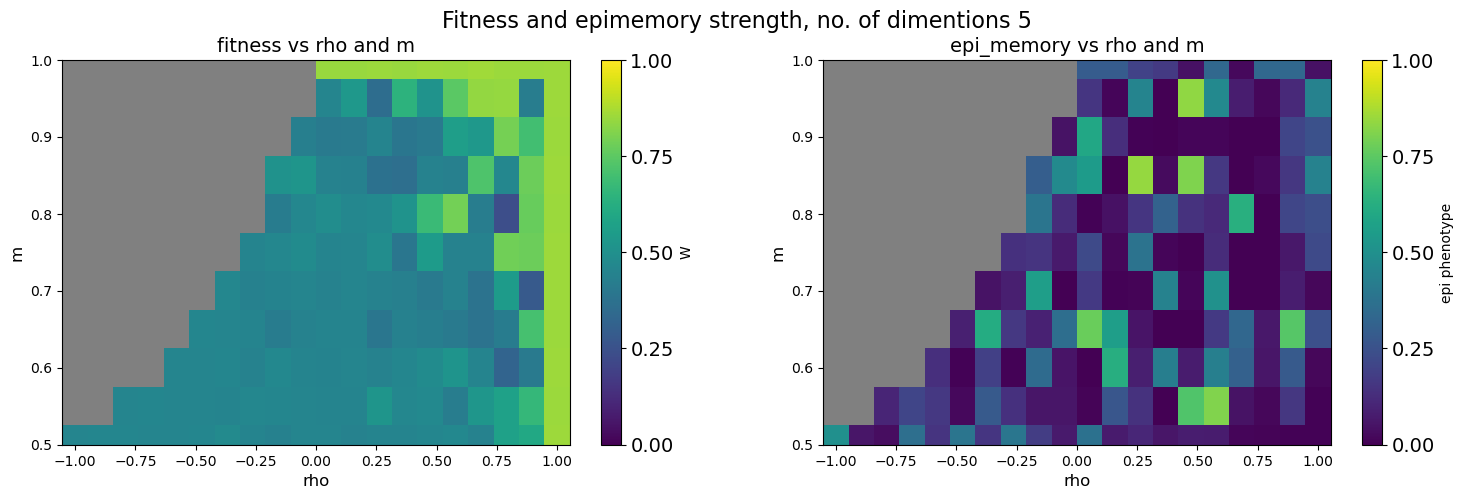

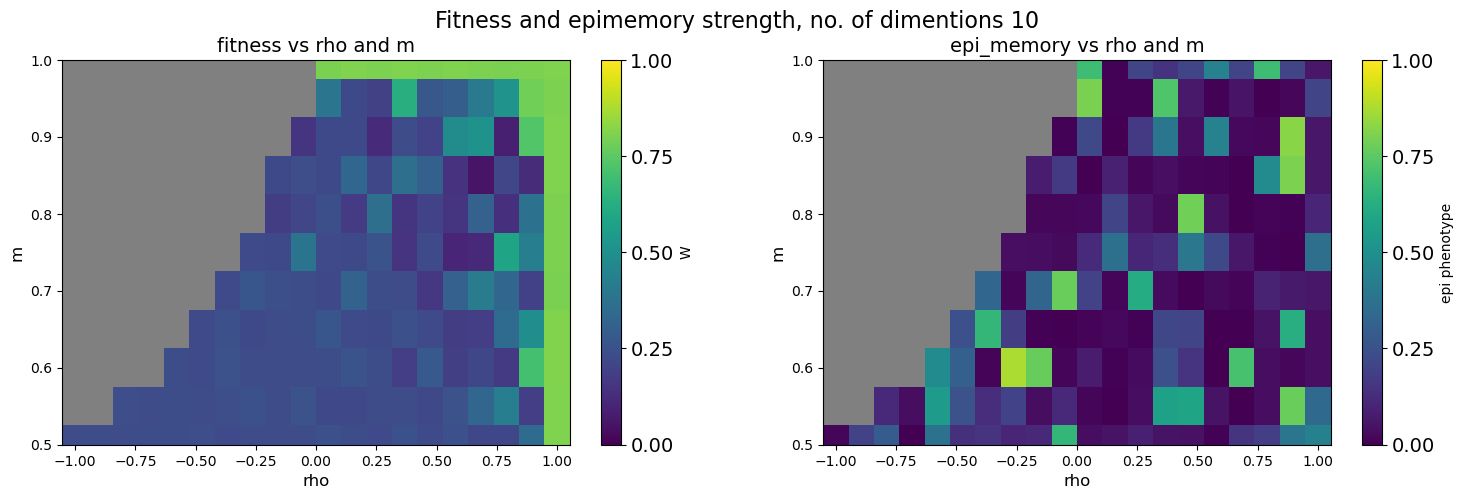

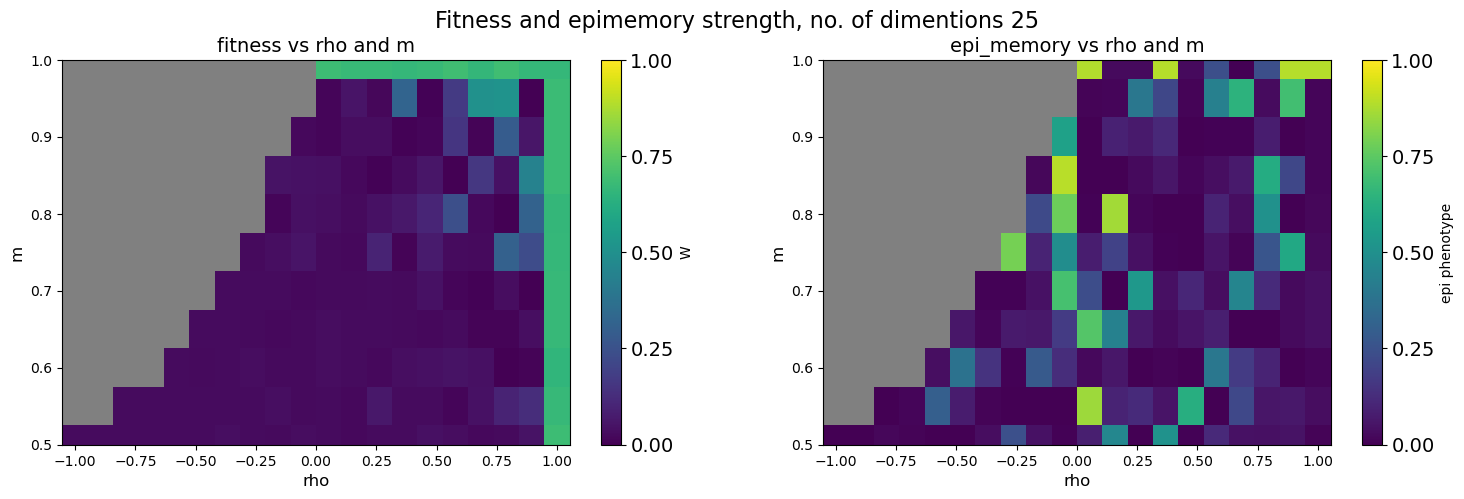

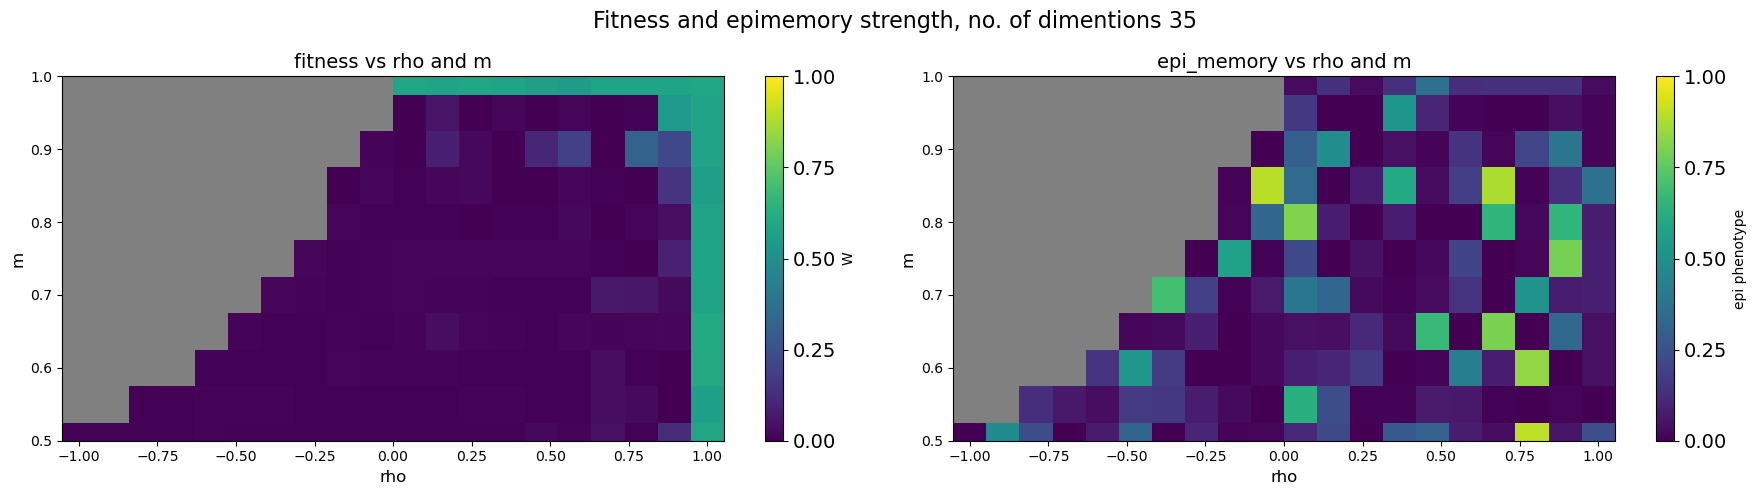

In [16]:

for dim_name in sorted_og_keys:
    
    dim = globals()[dim_name]
    
    nof_dims = re.findall(r'\d+', dim_name)[0]
        
    rho_ext, m_ext = np.meshgrid(dim['rho_m_alpha_beta'][:,0],dim['rho_m_alpha_beta'][:,1])

    df = pd.DataFrame({
        
    'rho': dim['rho_m_alpha_beta'][:,0],
    'm': dim['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim['meanw'][:,-10:], axis=1),
    'epi_mem_p': np.mean(dim['meanmemory_p'][:,-10:], axis=1)   
    
    })

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(f"Fitness and epimemory strength, no. of dimentions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()  # copy to modify safely
    cmap.set_bad(color='gray')    # gray for masked values
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # consistent color range

    # --- Plot 1: fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm1 = ax[0].pcolormesh(
        pivoted_fitness.columns,    # X (m)
        pivoted_fitness.index,      # Y (rho)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar1 = fig.colorbar(pcm1, ax=ax[0], label='W', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar1.ax.tick_params(labelsize=14)
    ax[0].set_ylabel('m', fontsize=12)
    ax[0].set_ylim(0.5,1)
    ax[0].set_xlabel('rho', fontsize=12)
    ax[0].set_title('fitness vs rho and m', fontsize=14)

    # --- Plot 2: epi_mem_p ---
    pivoted_epi = df.pivot_table(
        index='m',
        columns='rho',
        values='epi_mem_p'
    ).sort_index().sort_index(axis=1)

    pcm2 = ax[1].pcolormesh(
        pivoted_epi.columns, 
        pivoted_epi.index,
        pivoted_epi.values,
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar2 = fig.colorbar(pcm2, ax=ax[1], label=r'epi phenotype', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar2.ax.tick_params(labelsize=14)
    ax[1].set_ylabel('m', fontsize=12)
    ax[1].set_ylim(0.5,1)
    ax[1].set_xlabel('rho', fontsize=12)
    ax[1].set_title('epi_memory vs rho and m', fontsize=14)

plt.tight_layout()
plt.show()

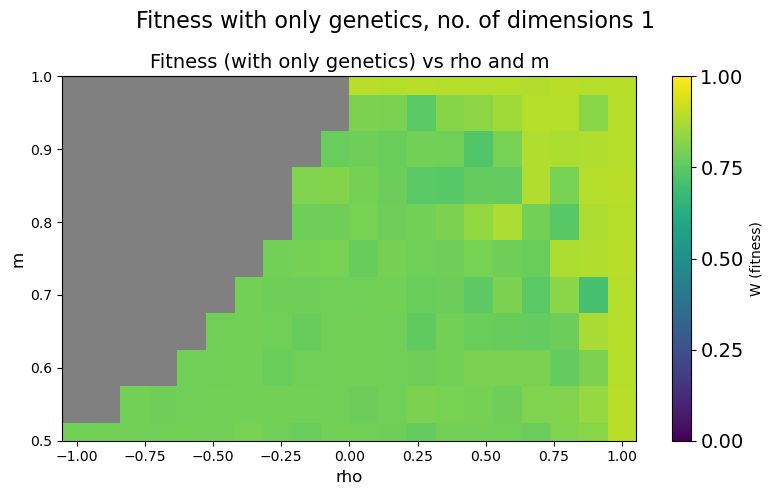

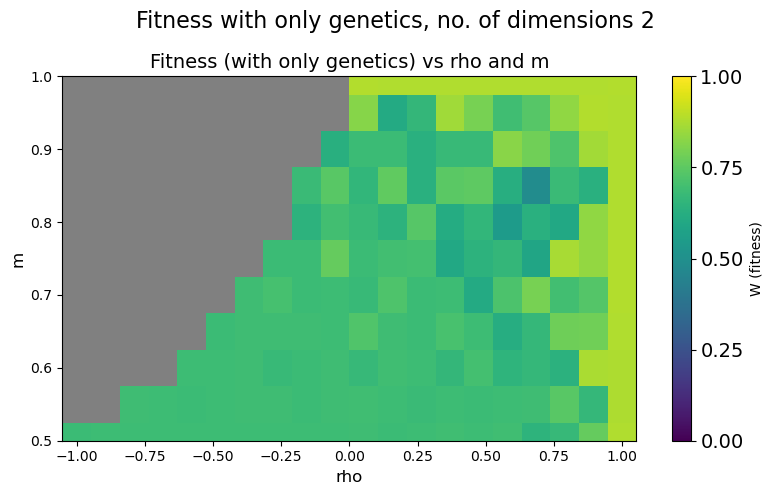

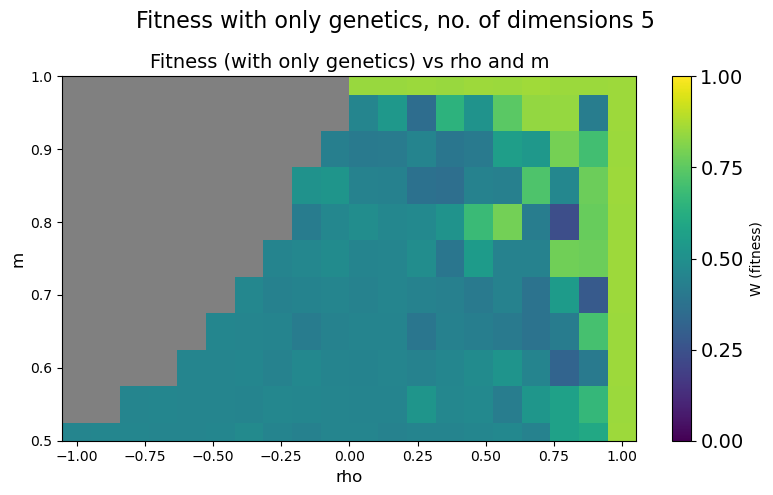

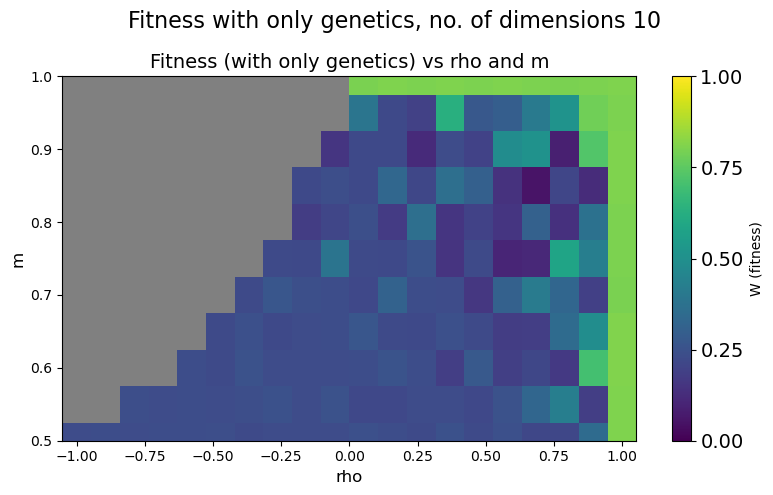

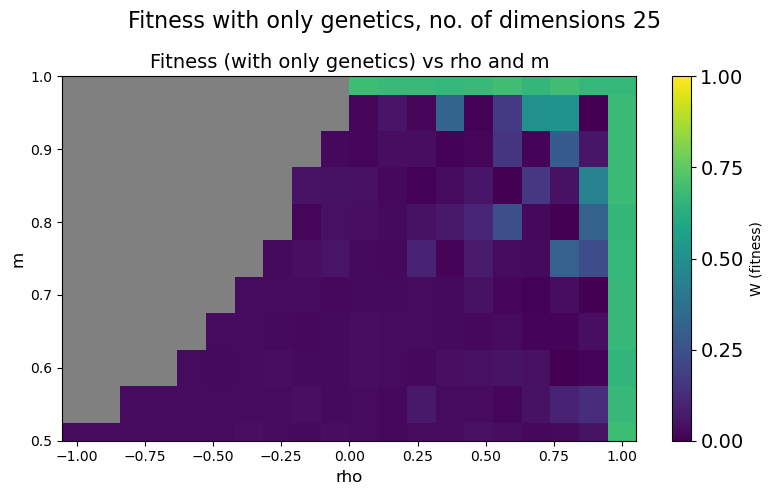

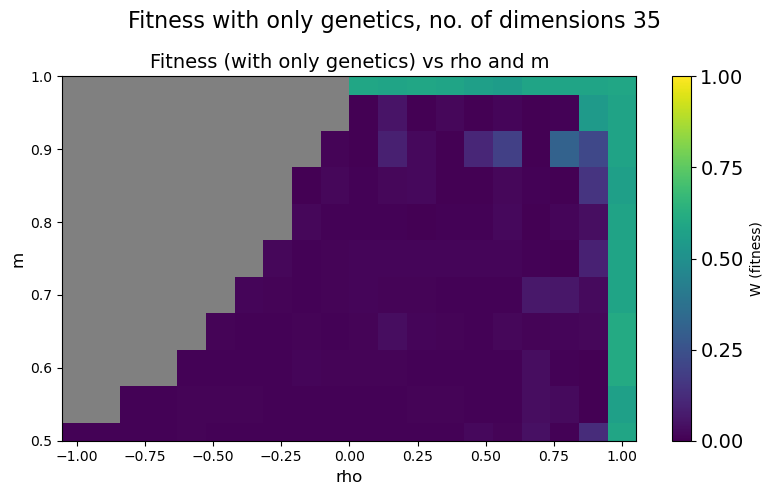

In [ ]:
for dim_name in sorted_og_keys:
    
    dim = globals()[dim_name]
    nof_dims = re.findall(r'\d+', dim_name)[0]
        
    df = pd.DataFrame({
        'rho': dim['rho_m_alpha_beta'][:, 0],
        'm': dim['rho_m_alpha_beta'][:, 1],
        'fitness': np.mean(dim['meanw'][:, -10:], axis=1)
    })

    fig, ax = plt.subplots(figsize=(8, 5))
    fig.suptitle(f"Fitness with only genetics, no. of dimensions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='gray')
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)

    # --- Plot fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm = ax.pcolormesh(
        pivoted_fitness.columns,    # X (rho)
        pivoted_fitness.index,      # Y (m)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )

    cbar = fig.colorbar(pcm, ax=ax, label='W (fitness)', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar.ax.tick_params(labelsize=14)
    ax.set_ylabel('m', fontsize=12)
    ax.set_ylim(0.5, 1)
    ax.set_xlabel('rho', fontsize=12)
    ax.set_title('Fitness (with only genetics) vs rho and m', fontsize=14)

    plt.tight_layout()
    plt.show()


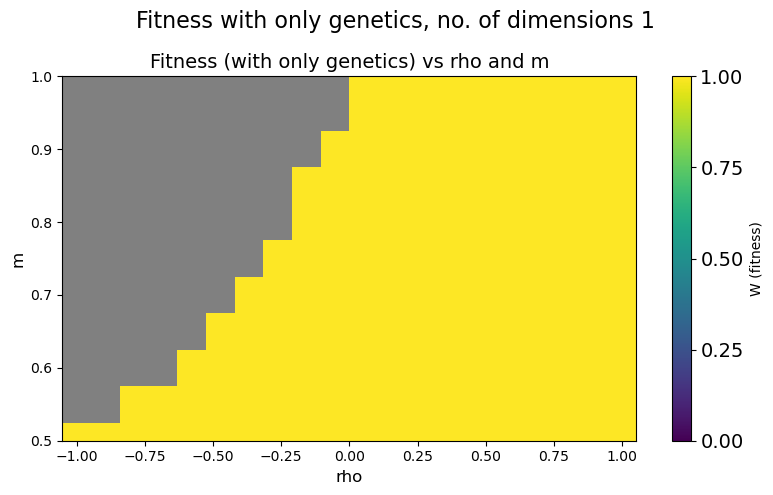

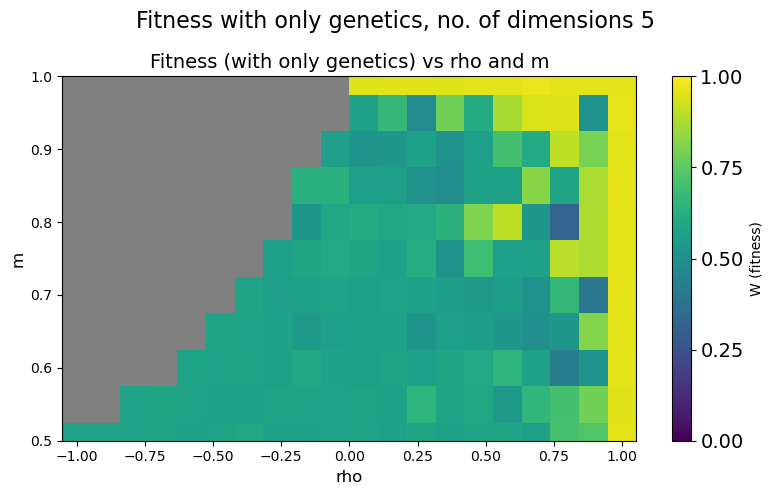

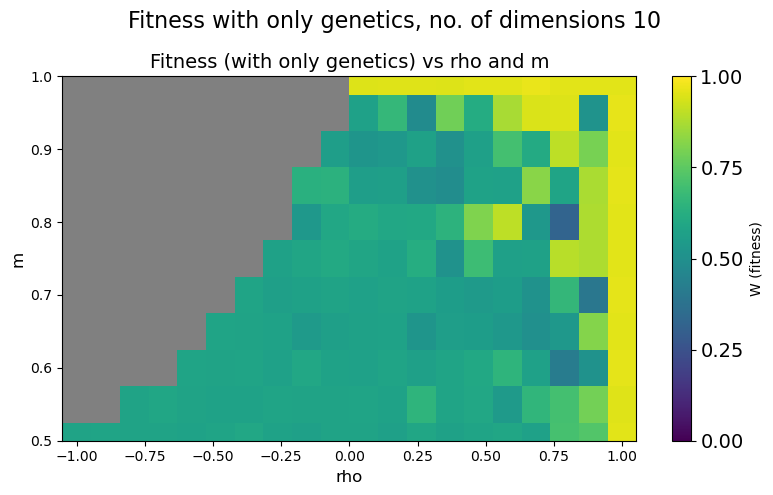

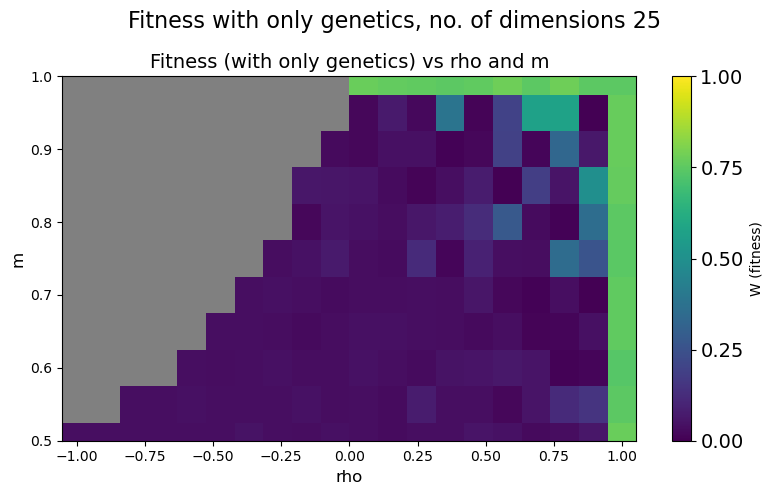

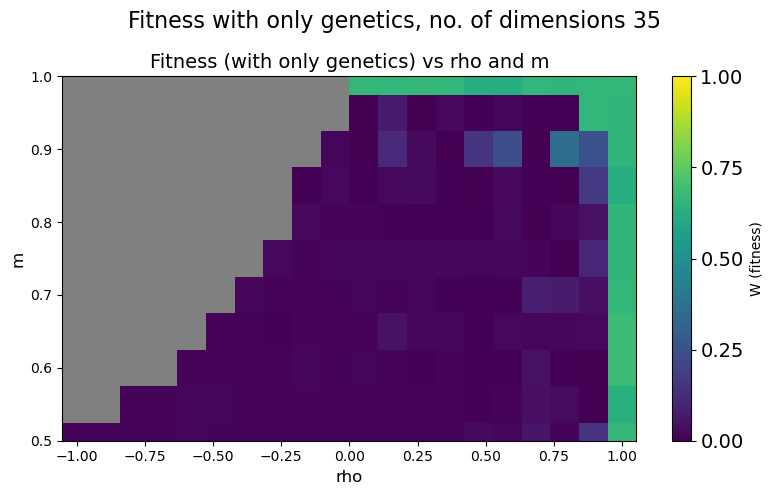

In [10]:
for dim_name in sorted_og_keys:
    
    dim = globals()[dim_name]
    nof_dims = re.findall(r'\d+', dim_name)[0]
    
    df_1 = pd.DataFrame({
        
    'rho': ntl_1['rho_m_alpha_beta'][:,0],
    'm': ntl_1['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(ntl_1['meanw'][:,-10:], axis=1)
    
    })
       
    df = pd.DataFrame({
        'rho': dim['rho_m_alpha_beta'][:, 0],
        'm': dim['rho_m_alpha_beta'][:, 1],
        'fitness': np.mean(dim['meanw'][:, -10:], axis=1)/ df_1['fitness']
    })

    fig, ax = plt.subplots(figsize=(8, 5))
    fig.suptitle(f"Fitness with only genetics, no. of dimensions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='gray')
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)

    # --- Plot fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm = ax.pcolormesh(
        pivoted_fitness.columns,    # X (rho)
        pivoted_fitness.index,      # Y (m)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )

    cbar = fig.colorbar(pcm, ax=ax, label='W (fitness)', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar.ax.tick_params(labelsize=14)
    ax.set_ylabel('m', fontsize=12)
    ax.set_ylim(0.5, 1)
    ax.set_xlabel('rho', fontsize=12)
    ax.set_title('Fitness (with only genetics) vs rho and m', fontsize=14)

    plt.tight_layout()
    plt.show()

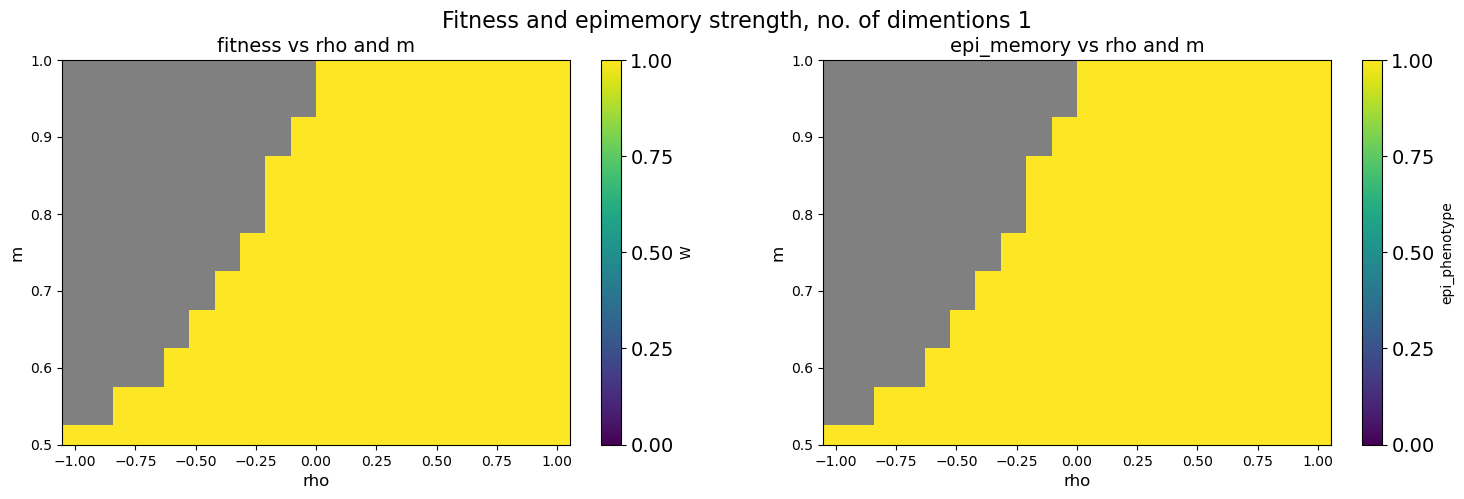

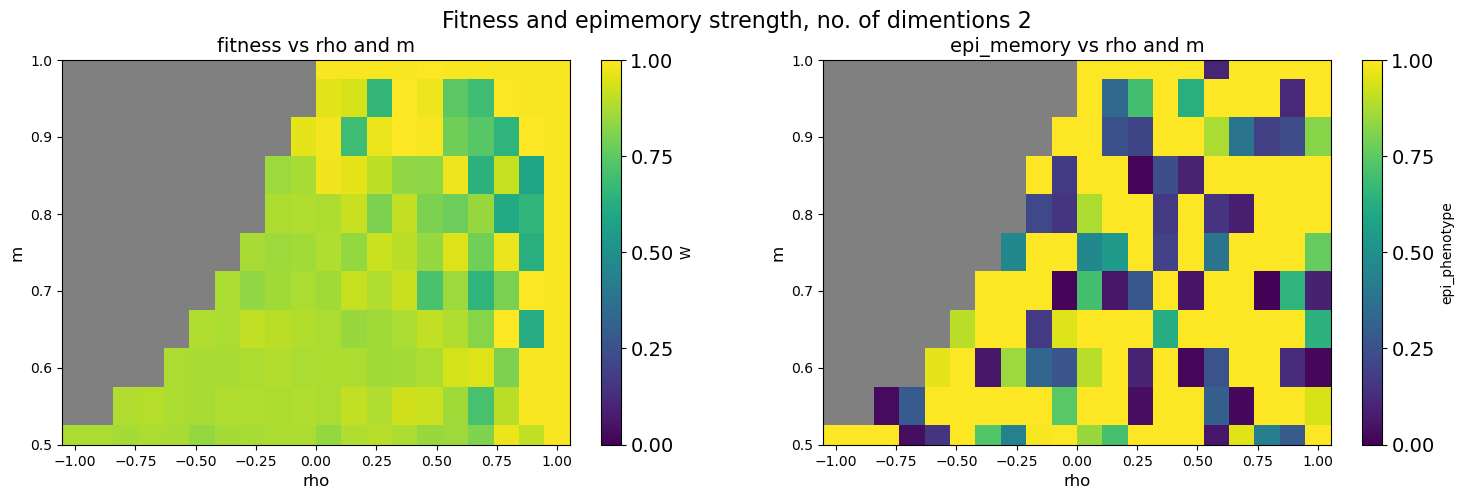

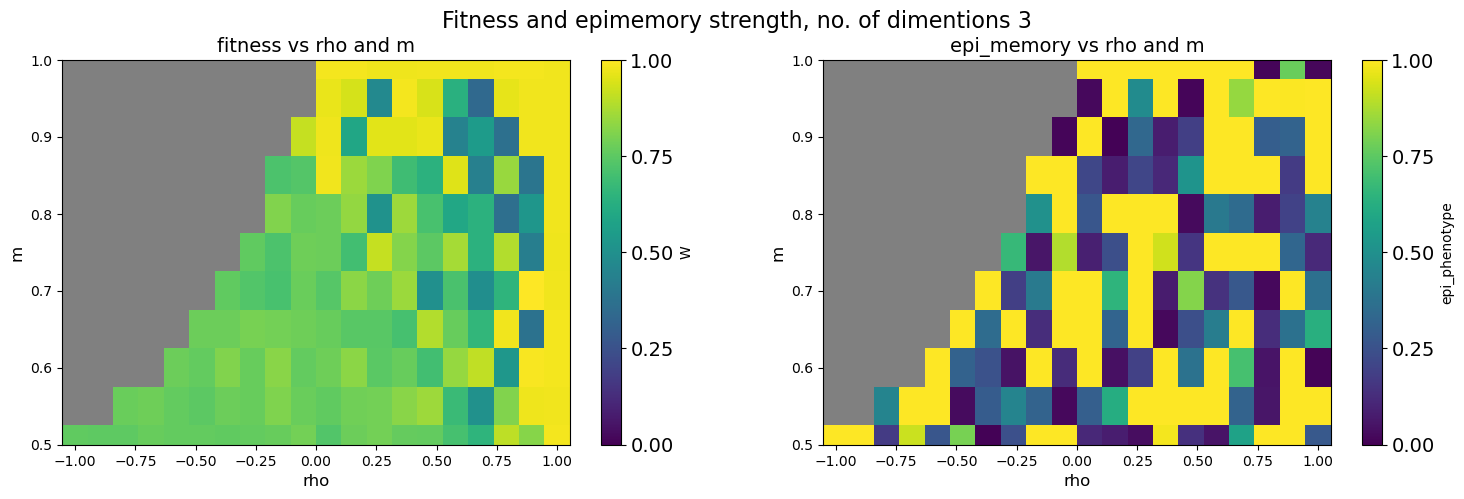

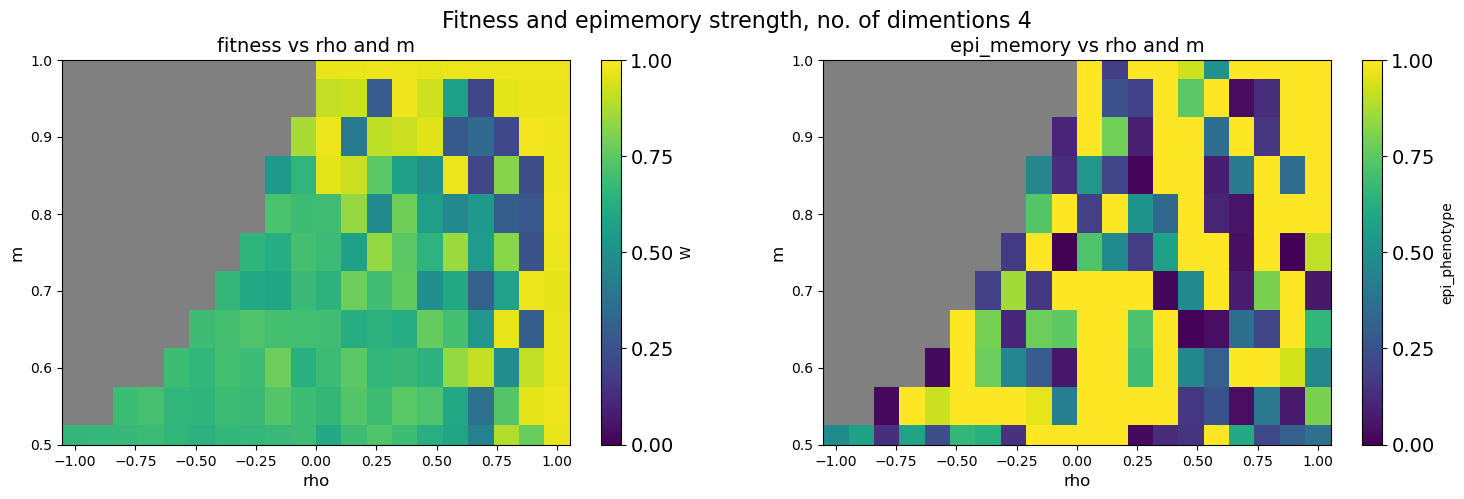

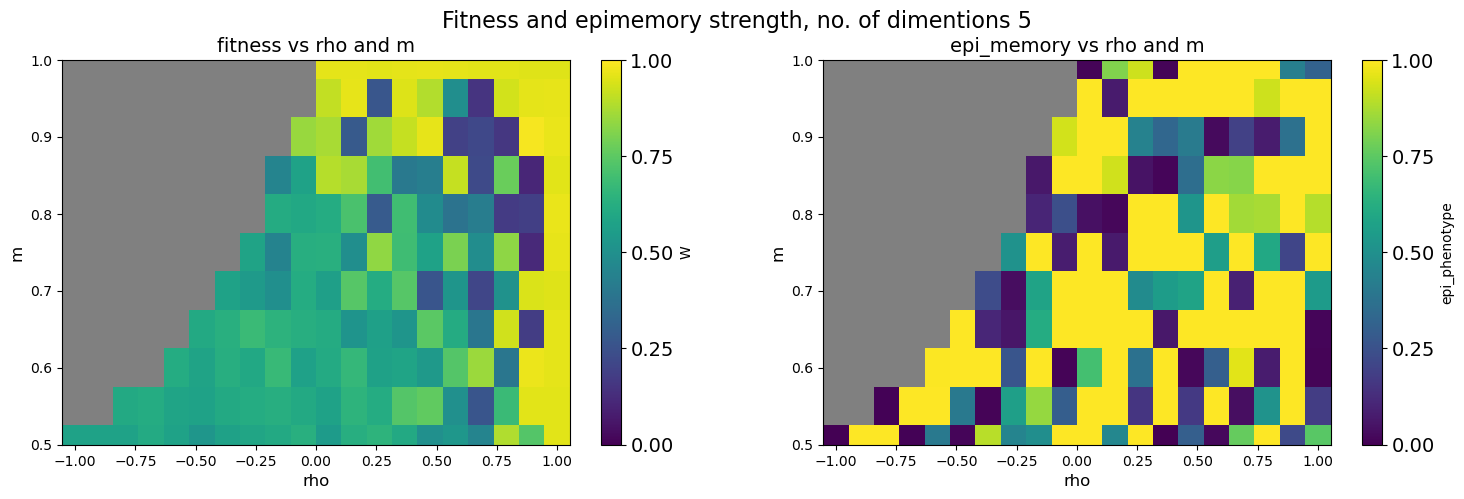

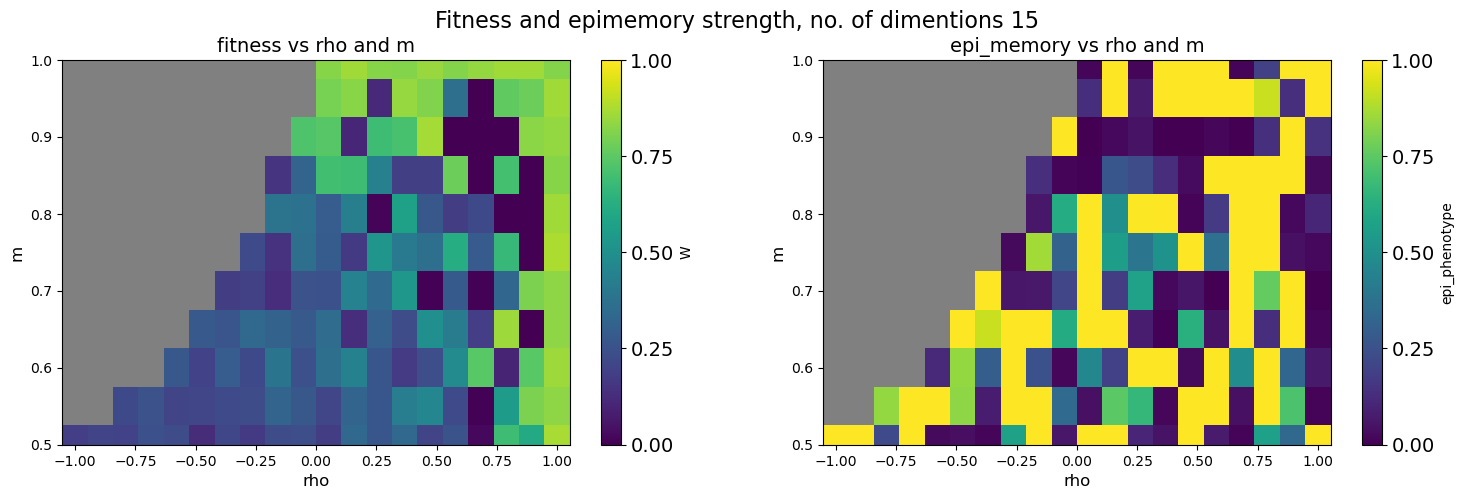

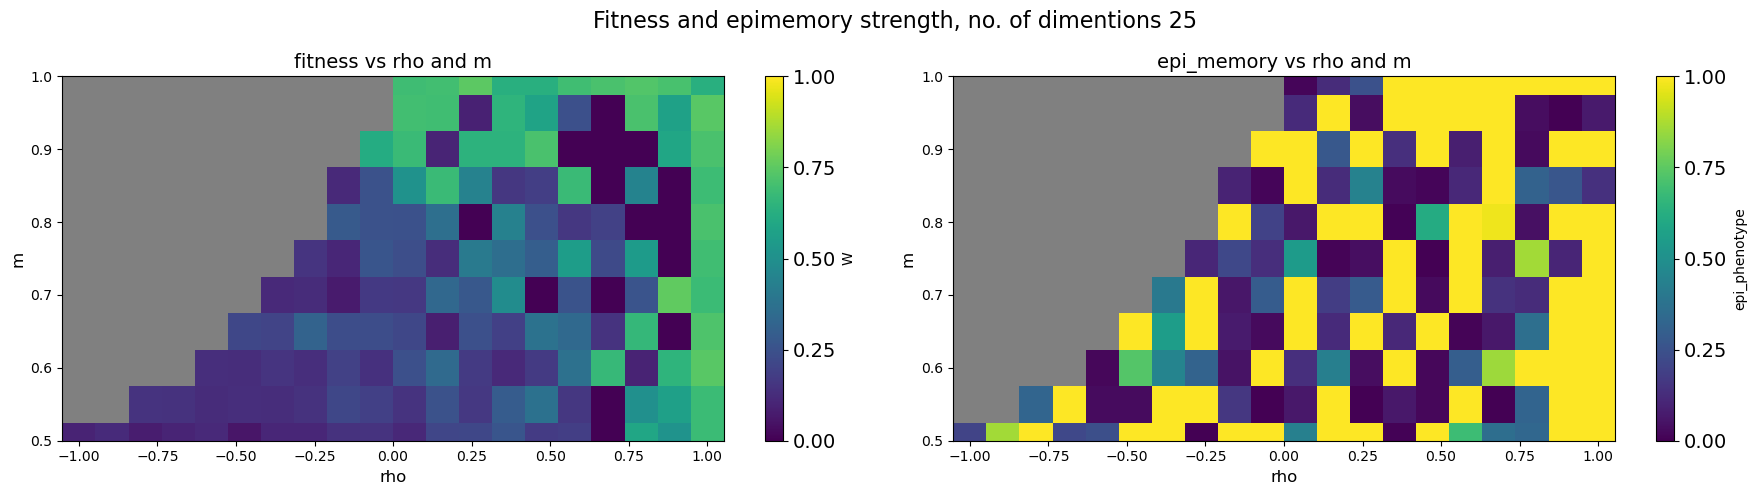

In [23]:
for dim_name in sorted_og_keys:
    
    dim = globals()[dim_name]
    
    nof_dims = re.findall(r'[0-9]+', dim_name)[0]
        
    rho_ext, m_ext = np.meshgrid(dim['rho_m_alpha_beta'][:,0],dim['rho_m_alpha_beta'][:,1])

    df_1 = pd.DataFrame({
        
    'rho': ntl_1['rho_m_alpha_beta'][:,0],
    'm': ntl_1['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(ntl_1['meanw'][:,-10:], axis=1),
    'epi_mem_p': np.mean(ntl_1['meanmemory_p'][:,-10:], axis=1)   
    
    })
    
    df = pd.DataFrame({
        
    'rho': dim['rho_m_alpha_beta'][:,0],
    'm': dim['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim['meanw'][:,-10:], axis=1)/ df_1['fitness'],
    'epi_mem_p': np.mean(dim['meanmemory_p'][:,-10:], axis=1)/  df_1['epi_mem_p']   
    
    })

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(f"Fitness and epimemory strength, no. of dimentions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()  # copy to modify safely
    cmap.set_bad(color='gray')    # gray for masked values
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # consistent color range

    # --- Plot 1: fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm1 = ax[0].pcolormesh(
        pivoted_fitness.columns,    # X (m)
        pivoted_fitness.index,      # Y (rho)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar1 = fig.colorbar(pcm1, ax=ax[0], label='W', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar1.ax.tick_params(labelsize=14)
    ax[0].set_xlabel('rho', fontsize=12)
    ax[0].set_ylabel('m', fontsize=12)
    ax[0].set_ylim(0.5,1)
    ax[0].set_title('fitness vs rho and m', fontsize=14)

    # --- Plot 2: epi_mem_p ---
    pivoted_epi = df.pivot_table(
        index='m',
        columns='rho',
        values='epi_mem_p'
    ).sort_index().sort_index(axis=1)

    pcm2 = ax[1].pcolormesh(
        pivoted_epi.columns, 
        pivoted_epi.index,
        pivoted_epi.values,
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar2 = fig.colorbar(pcm2, ax=ax[1], label=r'epi_phenotype', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar2.ax.tick_params(labelsize=14)
    ax[1].set_xlabel('rho', fontsize=12)
    ax[1].set_ylabel('m', fontsize=12)
    ax[1].set_ylim(0.5,1)
    ax[1].set_title('epi_memory vs rho and m', fontsize=14)

plt.tight_layout()
plt.show()